# HR-аналитика

## Шаг 1. Загрузка и изучение данных

Произведем необходимые импорты

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV,
    RandomizedSearchCV
)

from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, 
    OneHotEncoder, OrdinalEncoder, LabelEncoder
)

from sklearn.metrics import (
    make_scorer,
    confusion_matrix, 
    roc_curve,
    roc_auc_score
)

plt.rcParams["figure.figsize"] = (10, 6)

Создадим функции для работы

In [2]:
# функция вывода информации о датасете
def dataset_info(dataset):
    display(dataset.info())
    display(dataset.describe())
    display(dataset.head())

In [3]:
# функция для проверки на дубликаты и вывода значений
def get_duplcate():
    
    dataframes = {
        'train_job_satisfaction_rate': train_job_satisfaction_rate,
        'test_features': test_features,
        'test_target_job_satisfaction_rate': test_target_job_satisfaction_rate,
        'train_quit': train_quit,
        'test_target_quit': test_target_quit
    }
    
    for name, df in dataframes.items():
        print(
            f'Дубликатов в датафрейме {name}:', 
            df.duplicated().sum(), '- это', 
            round((df.duplicated().sum() / len(df)), 2), 'от всех данных'
    )

Загрузим данные

In [4]:
pd.set_option('display.max_columns', None) # установим опцию по выводу всех колонок датафрейма

# укажем формат отображения больших чисел,
pd.set_option('display.float_format', '{:.2f}'.format) # чтобы не применялась экспоненциальная запись в таблицах

In [5]:
# прочитаем файлы

train_job_satisfaction_rate = pd.read_csv('./train_job_satisfaction_rate.csv', sep= ',')
test_features = pd.read_csv('./test_features.csv', sep= ',')
test_target_job_satisfaction_rate = pd.read_csv('./test_target_job_satisfaction_rate.csv', sep= ',')
train_quit = pd.read_csv('./train_quit.csv', sep= ',')
test_target_quit = pd.read_csv('./test_target_quit.csv', sep= ',')

### Изучим общую информацию о каждом датафрейме

In [6]:
dataset_info(train_job_satisfaction_rate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.00,4000.00,4000.00,4000.00,4000.00
mean,544957.62,3.72,3.48,33926.70,0.53
std,257883.10,2.54,1.01,14900.70,0.23
min,100954.00,1.00,1.00,12000.00,0.03
25%,322836.75,2.00,3.00,22800.00,0.36
50%,534082.50,3.00,4.00,30000.00,0.56
75%,771446.00,6.00,4.00,43200.00,0.71
max,999521.00,10.00,5.00,98400.00,1.00


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [7]:
dataset_info(test_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,2000.00,2000.00,2000.00,2000.00
mean,552765.21,3.67,3.53,34066.80
std,253851.33,2.54,1.00,15398.44
min,100298.00,1.00,1.00,12000.00
25%,339052.00,1.00,3.00,22800.00
50%,550793.00,3.00,4.00,30000.00
75%,765763.75,6.00,4.00,43200.00
max,999029.00,10.00,5.00,96000.00


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [8]:
dataset_info(test_target_job_satisfaction_rate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
count,2000.00,2000.00
mean,552765.21,0.55
std,253851.33,0.22
min,100298.00,0.03
25%,339052.00,0.38
50%,550793.00,0.58
75%,765763.75,0.72
max,999029.00,1.00


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [9]:
dataset_info(train_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,4000.00,4000.00,4000.00,4000.00
mean,552099.28,3.70,3.47,33805.80
std,260158.03,2.54,1.00,15152.42
min,100222.00,1.00,1.00,12000.00
25%,327785.75,2.00,3.00,22800.00
50%,546673.00,3.00,4.00,30000.00
75%,781497.75,6.00,4.00,43200.00
max,999915.00,10.00,5.00,96000.00


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [10]:
dataset_info(test_target_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

,id
count,2000.00
mean,552765.21
std,253851.33
min,100298.00
25%,339052.00
50%,550793.00
75%,765763.75
max,999029.00


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


**Вывод:** Пропуски обнаружены в датафреймах `train_job_satisfaction_rate` и `test_features`. В датафреймах с тестовыми данными не совпадают id, нужно проверить их на этапе предобработки.

## Шаг 2. Предобработка данных

### Исследуем данные на дубликаты

In [11]:
get_duplcate()

Дубликатов в датафрейме train_job_satisfaction_rate: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_features: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_target_job_satisfaction_rate: 0 - это 0.0 от всех данных
Дубликатов в датафрейме train_quit: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_target_quit: 0 - это 0.0 от всех данных


Явных дубликатов в данных нет.

### Проверим уникальные значения в столбцах

В датафрейме `train_job_satisfaction_rate`

In [12]:
print('В столбце \'dept\':', len(train_job_satisfaction_rate['dept'].unique()))
print(train_job_satisfaction_rate['dept'].value_counts())

В столбце 'dept': 6
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64


In [13]:
print('В столбце \'level\':', len(train_job_satisfaction_rate['level'].unique()))
print(train_job_satisfaction_rate['level'].value_counts())

В столбце 'level': 4
junior    1894
middle    1744
sinior     358
Name: level, dtype: int64


In [14]:
print('В столбце \'workload\':', len(train_job_satisfaction_rate['workload'].unique()))
print(train_job_satisfaction_rate['workload'].value_counts())

В столбце 'workload': 3
medium    2066
low       1200
high       734
Name: workload, dtype: int64


In [15]:
print('В столбце \'last_year_promo\':', len(train_job_satisfaction_rate['last_year_promo'].unique()))
print(train_job_satisfaction_rate['last_year_promo'].value_counts())

В столбце 'last_year_promo': 2
no     3880
yes     120
Name: last_year_promo, dtype: int64


In [16]:
print('В столбце \'last_year_violations\':', len(train_job_satisfaction_rate['last_year_violations'].unique()))
print(train_job_satisfaction_rate['last_year_violations'].value_counts())

В столбце 'last_year_violations': 2
no     3441
yes     559
Name: last_year_violations, dtype: int64


В датафрейме `test_features`

In [17]:
print('В столбце \'dept\':', len(test_features['dept'].unique()))
print(test_features['dept'].value_counts())

В столбце 'dept': 7
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64


In [18]:
print('В столбце \'level\':', len(test_features['level'].unique()))
print(test_features['level'].value_counts())

В столбце 'level': 4
junior    974
middle    854
sinior    171
Name: level, dtype: int64


In [19]:
print('В столбце \'workload\':', len(test_features['workload'].unique()))
print(test_features['workload'].value_counts())

В столбце 'workload': 4
medium    1043
low        593
high       363
             1
Name: workload, dtype: int64


In [20]:
print('В столбце \'last_year_promo\':', len(test_features['last_year_promo'].unique()))
print(test_features['last_year_promo'].value_counts())

В столбце 'last_year_promo': 2
no     1937
yes      63
Name: last_year_promo, dtype: int64


In [21]:
print('В столбце \'last_year_violations\':', len(test_features['last_year_violations'].unique()))
print(test_features['last_year_violations'].value_counts())

В столбце 'last_year_violations': 2
no     1738
yes     262
Name: last_year_violations, dtype: int64


В датафрейме `train_quit`

In [22]:
print('В столбце \'dept\':', len(train_quit['dept'].unique()))
print(train_quit['dept'].value_counts()) 

В столбце 'dept': 5
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64


In [23]:
print('В столбце \'level\':', len(train_quit['level'].unique()))
print(train_quit['level'].value_counts()) 

В столбце 'level': 3
junior    1949
middle    1694
sinior     357
Name: level, dtype: int64


In [24]:
print('В столбце \'workload\':', len(train_quit['workload'].unique()))
print(train_quit['workload'].value_counts()) 

В столбце 'workload': 3
medium    2118
low       1208
high       674
Name: workload, dtype: int64


In [25]:
print('В столбце \'last_year_promo\':', len(train_quit['last_year_promo'].unique()))
print(train_quit['last_year_promo'].value_counts()) 

В столбце 'last_year_promo': 2
no     3887
yes     113
Name: last_year_promo, dtype: int64


In [26]:
print('В столбце \'last_year_violations\':', len(train_quit['last_year_violations'].unique()))
print(train_quit['last_year_violations'].value_counts()) 

В столбце 'last_year_violations': 2
no     3455
yes     545
Name: last_year_violations, dtype: int64


In [27]:
print('В столбце \'quit\':', len(train_quit['quit'].unique()))
print(train_quit['quit'].value_counts()) 

В столбце 'quit': 2
no     2872
yes    1128
Name: quit, dtype: int64


В датафрейме `test_target_quit`

In [28]:
print('В столбце \'quit\':', len(test_target_quit['quit'].unique()))
print(test_target_quit['quit'].value_counts()) 

В столбце 'quit': 2
no     1436
yes     564
Name: quit, dtype: int64


Посмотрим на строки с пробелами

In [29]:
test_features[test_features['dept'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


In [30]:
test_features[test_features['workload'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


Заполним пробелы самыми частыми значениями

In [31]:
test_features['dept'] = test_features['dept'].str.replace (' ', 'sales')
test_features['workload'] = test_features['workload'].str.replace (' ', 'medium')

# проверим результат
print(test_features['dept'].value_counts())
print(test_features['workload'].value_counts())

sales         764
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64
medium    1044
low        593
high       363
Name: workload, dtype: int64


Исправим ошибку в написании должностного уровня.

In [32]:
train_job_satisfaction_rate['level'] = train_job_satisfaction_rate['level'].str.replace ('sinior', 'senior')
# проверим результат
print(train_job_satisfaction_rate['level'].value_counts())

junior    1894
middle    1744
senior     358
Name: level, dtype: int64


In [33]:
test_features['level'] = test_features['level'].str.replace ('sinior', 'senior')
# проверим результат
print(test_features['level'].value_counts())

junior    974
middle    854
senior    171
Name: level, dtype: int64


In [34]:
train_quit['level'] = train_quit['level'].str.replace ('sinior', 'senior')
# проверим результат
print(train_quit['level'].value_counts())

junior    1949
middle    1694
senior     357
Name: level, dtype: int64


Проверим тестовые данные на соответствие id

In [35]:
test_features['id'][~test_features['id'].isin(test_target_quit['id'])]

Series([], Name: id, dtype: int64)

In [36]:
test_features['id'][~test_features['id'].isin(test_target_job_satisfaction_rate['id'])]

Series([], Name: id, dtype: int64)

Все id на месте, просто вероятно не в нужном порядке. Чтобы привести их в порядок, объединим все тестовые данные по id, а потом разделим.

In [37]:
test_all = test_features.merge(test_target_quit, how= 'left', on = 'id')
test_all = test_all.merge(test_target_job_satisfaction_rate, how= 'left', on = 'id')

In [38]:
test_features = test_all.drop(['quit', 'job_satisfaction_rate'], axis= 1)
test_features

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [39]:
test_target_quit = test_all.drop(
    ['job_satisfaction_rate', 'dept', 'level', 'workload', 'employment_years',
     'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary'
    ], axis= 1)

test_target_quit

,id,quit
0,485046,no
1,686555,no
2,467458,no
3,418655,no
4,789145,no
...,...,...
1995,393147,yes
1996,109582,yes
1997,305653,yes
1998,160233,no


In [40]:
test_target_job_satisfaction_rate = test_all.drop(
    ['quit', 'dept', 'level', 'workload', 'employment_years',
     'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary'
    ], axis= 1)

test_target_job_satisfaction_rate

,id,job_satisfaction_rate
0,485046,0.79
1,686555,0.72
2,467458,0.64
3,418655,0.60
4,789145,0.75
...,...,...
1995,393147,0.56
1996,109582,0.14
1997,305653,0.11
1998,160233,0.43


**Вывод:** На этапе предобработки данных явных дубликатов не выявлено, от неявных мы избавились, устранили опечатку в наименовании должностного уровня, а также привели в порядок тестовые данные по id. От пропусков избавимся далее при работе с пайплайном.

## Шаг 3. Исследовательский анализ данных

### Изучим целевые признаки

#### Для задачи № 1

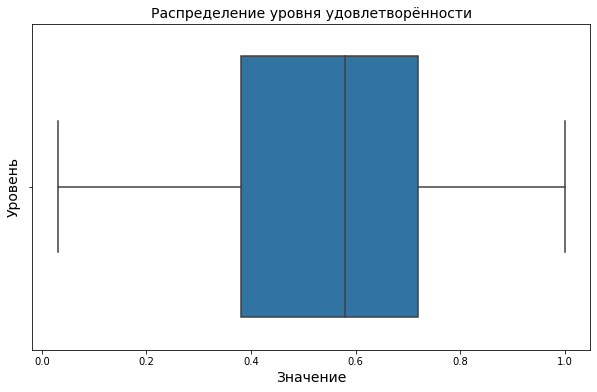

In [41]:
boxplot = sns.boxplot(x= test_target_job_satisfaction_rate['job_satisfaction_rate'])
boxplot.axes.set_title('Распределение уровня удовлетворённости', fontsize=14)
boxplot.set_xlabel('Значение', fontsize=14)
boxplot.set_ylabel('Уровень', fontsize=14);

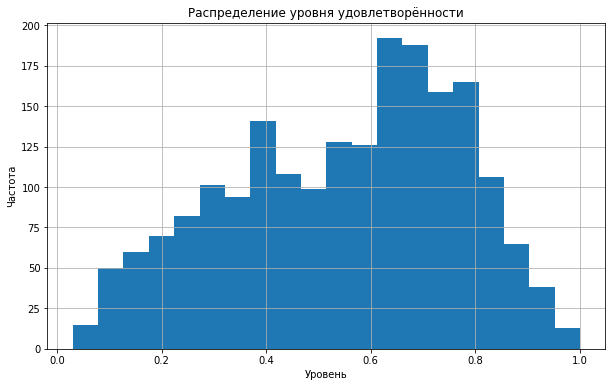

In [42]:
test_target_job_satisfaction_rate['job_satisfaction_rate'].plot(kind = 'hist', grid=True, bins = 20)
plt.title('Распределение уровня удовлетворённости')
plt.xlabel('Уровень')
plt.ylabel('Частота')
plt.show()

Text(0, 0.5, 'Рейтинг')

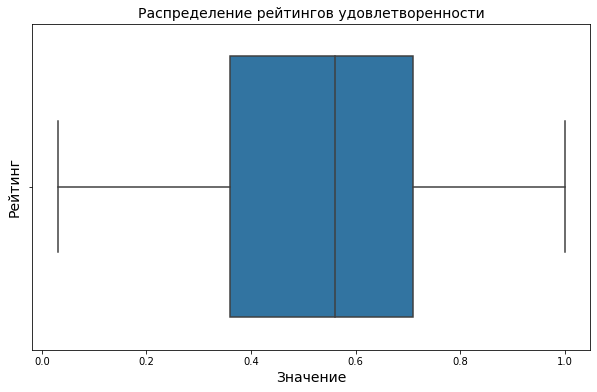

In [43]:
boxplot = sns.boxplot(x= train_job_satisfaction_rate['job_satisfaction_rate'])
boxplot.axes.set_title('Распределение рейтингов удовлетворенности', fontsize=14)
boxplot.set_xlabel('Значение', fontsize=14)
boxplot.set_ylabel('Рейтинг', fontsize=14)

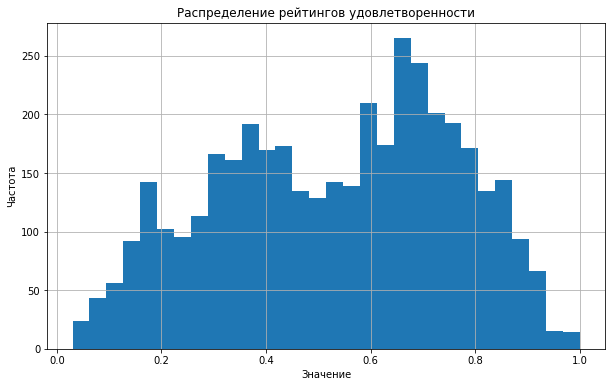

In [44]:
train_job_satisfaction_rate['job_satisfaction_rate'].plot(kind = 'hist', grid=True, bins = 30)
plt.title('Распределение рейтингов удовлетворенности')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Распределение похоже на нормальное с двумя пиками. Это может говорить о том, что в выборку включены значения, объединяющие разные группы сотрудников. В основном уровень удовлетворенности сотрудников находится в пределах 0.4 - 0.7.

#### Для задачи № 2

In [45]:
# посмотрим соотношение значений
pivot_test_target_quit = test_target_quit.pivot_table(
    index= 'quit', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

pivot_test_target_quit

,quit,id
0,yes,564
1,no,1436


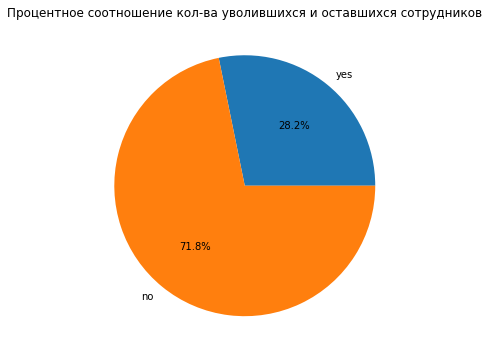

In [46]:
# построим круговую диаграмму
fig, ax = plt.subplots()
ax.pie(pivot_test_target_quit['id'], labels= pivot_test_target_quit['quit'], autopct='%1.1f%%')
plt.title('Процентное соотношение кол-ва уволившихся и оставшихся сотрудников')

plt.show()

Видим, что уволившиеся составляют около 30% от всех сотрудников: достаточно большое количество.

### Изучим входные признаки

Посмотрим на распределение количественных признаков в тренировочных выборках для обеих задач и в тестовой выборке, сравним данные.

In [47]:
years_train_rate = train_job_satisfaction_rate.pivot_table(
    index= 'employment_years', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

years_train_quit = train_quit.pivot_table(
    index= 'employment_years', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

years_test_features = test_features.pivot_table(
    index= 'employment_years', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

years = years_train_rate.merge(years_train_quit, on='employment_years', how='right')
years = years.merge(years_test_features, on='employment_years', how='right')
years.rename(
    columns = {'id_x':'train_job_satisfaction_rate', 'id_y':'train_quit', 'id': 'test_features'}, inplace=True)

years

,train_job_satisfaction_rate,train_quit,test_features
employment_years,,,
10,91,90,35
9,130,136,66
8,193,174,91
6,287,296,138
7,301,308,174
5,380,362,179
4,384,393,187
3,483,479,234
2,785,777,374


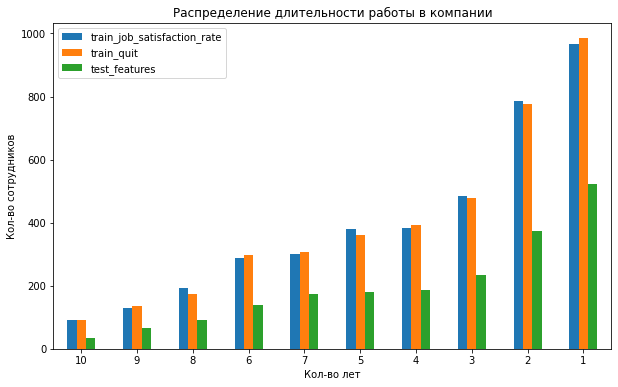

In [48]:
years.plot(kind='bar', legend= True, rot=0)
plt.title('Распределение длительности работы в компании')
plt.xlabel('Кол-во лет')
plt.ylabel('Кол-во сотрудников')
plt.legend(loc='upper left')
plt.show()

Во всех трёх выборках данные распределены одинаково, в данный момент в компании много "новичков", которые работают менее 3 лет.

In [49]:
evaluation_train_rate = train_job_satisfaction_rate.pivot_table(
    index= 'supervisor_evaluation', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

evaluation_train_quit = train_quit.pivot_table(
    index= 'supervisor_evaluation', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

evaluation_test_features = test_features.pivot_table(
    index= 'supervisor_evaluation', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

evaluation = evaluation_train_rate.merge(evaluation_train_quit, on='supervisor_evaluation', how='right')
evaluation = evaluation.merge(evaluation_test_features, on='supervisor_evaluation', how='right')
evaluation.rename(
    columns = {'id_x':'train_job_satisfaction_rate', 'id_y':'train_quit', 'id': 'test_features'}, inplace=True)

evaluation

,train_job_satisfaction_rate,train_quit,test_features
supervisor_evaluation,,,
1,201,202,88
2,387,391,196
5,546,520,284
3,1263,1233,575
4,1603,1654,857


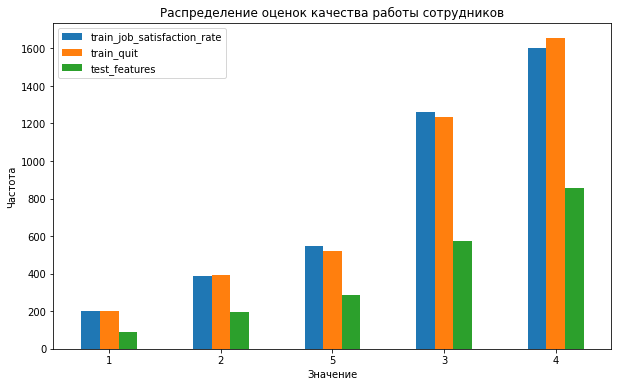

In [50]:
evaluation.plot(kind='bar', legend= True, rot=0)
plt.title('Распределение оценок качества работы сотрудников')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend(loc='upper left')
plt.show()

Видим, что руководители чаще всего оценивают работу сотрудников на 3 и 4 балла. Максимальный балл получают очень немногие.

Посмотрим на распределение объемов заработной платы

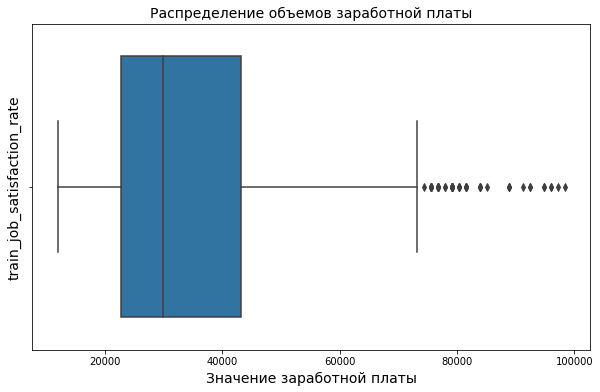

In [51]:
boxplot = sns.boxplot(x= train_job_satisfaction_rate['salary'])
boxplot.axes.set_title('Распределение объемов заработной платы', fontsize=14)
boxplot.set_xlabel('Значение заработной платы', fontsize=14)
boxplot.set_ylabel('train_job_satisfaction_rate', fontsize=14);

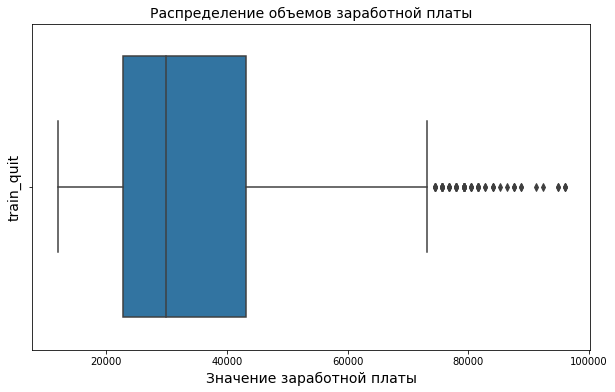

In [52]:
boxplot = sns.boxplot(x= train_quit['salary'])
boxplot.axes.set_title('Распределение объемов заработной платы', fontsize=14)
boxplot.set_xlabel('Значение заработной платы', fontsize=14)
boxplot.set_ylabel('train_quit', fontsize=14);

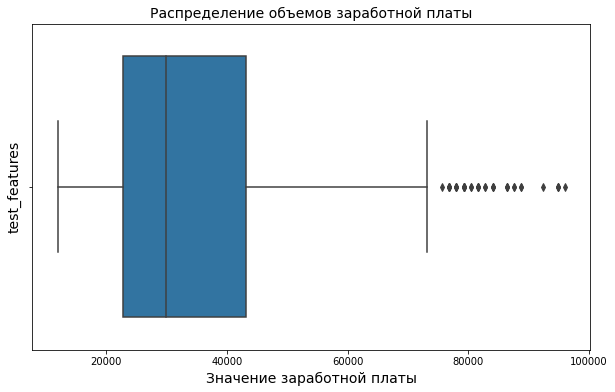

In [53]:
boxplot = sns.boxplot(x= test_features['salary'])
boxplot.axes.set_title('Распределение объемов заработной платы', fontsize=14)
boxplot.set_xlabel('Значение заработной платы', fontsize=14)
boxplot.set_ylabel('test_features', fontsize=14);

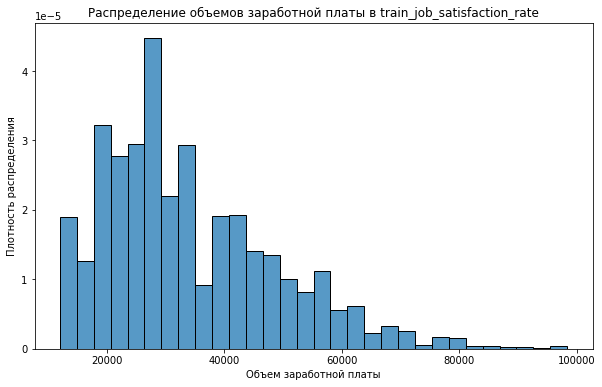

In [54]:
ax= sns.histplot(data= train_job_satisfaction_rate['salary'], stat='density', bins = 30, common_norm=False)
plt.title('Распределение объемов заработной платы в train_job_satisfaction_rate')
plt.xlabel('Объем заработной платы')
plt.ylabel('Плотность распределения')
plt.show()

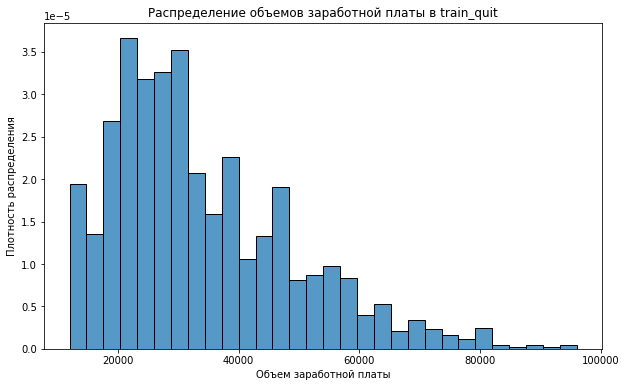

In [55]:
ax= sns.histplot(data= train_quit['salary'], stat='density', bins = 30, common_norm=False)
plt.title('Распределение объемов заработной платы в train_quit')
plt.xlabel('Объем заработной платы')
plt.ylabel('Плотность распределения')
plt.show()

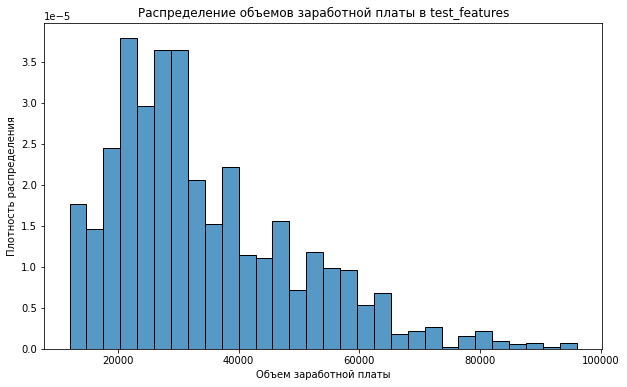

In [56]:
ax= sns.histplot(data= test_features['salary'], stat='density', bins = 30, common_norm=False)
plt.title('Распределение объемов заработной платы в test_features')
plt.xlabel('Объем заработной платы')
plt.ylabel('Плотность распределения')
plt.show()

Вероятно, в выборку включена заработная плата абсолютно всех сотрудников, так как мы видим на графиках большой разброс значений, с очень маленьким количеством высоких зарплат (выше 80 тыс.) руководящего состава. В основном заработная плата колеблется от 20 до 40 тысяч.

Изучим взаимосвязь между признаками. Так как в признаках нет нормального распределения, мы посчитаем корреляцию Спирмена отдельно для каждой выборки.

In [57]:
!pip install phik -q
import phik


[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
interval_cols_rate = ['salary', 'job_satisfaction_rate']
phik_overview_rate = train_job_satisfaction_rate.drop('id', axis= 1).phik_matrix(interval_cols= interval_cols_rate)
phik_overview_rate

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.00,0.00,0.02,0.04,0.00,0.00,0.11,0.27,0.08
level,0.00,1.00,0.42,0.68,0.10,0.00,0.00,0.71,0.08
workload,0.02,0.42,1.00,0.18,0.06,0.00,0.04,0.78,0.06
employment_years,0.04,0.68,0.18,1.00,0.18,0.06,0.00,0.47,0.33
last_year_promo,0.00,0.10,0.06,0.18,1.00,0.00,0.01,0.21,0.19
last_year_violations,0.00,0.00,0.00,0.06,0.00,1.00,0.18,0.02,0.56
supervisor_evaluation,0.11,0.00,0.04,0.00,0.01,0.18,1.00,0.00,0.76
salary,0.27,0.71,0.78,0.47,0.21,0.02,0.00,1.00,0.14
job_satisfaction_rate,0.08,0.08,0.06,0.33,0.19,0.56,0.76,0.14,1.00


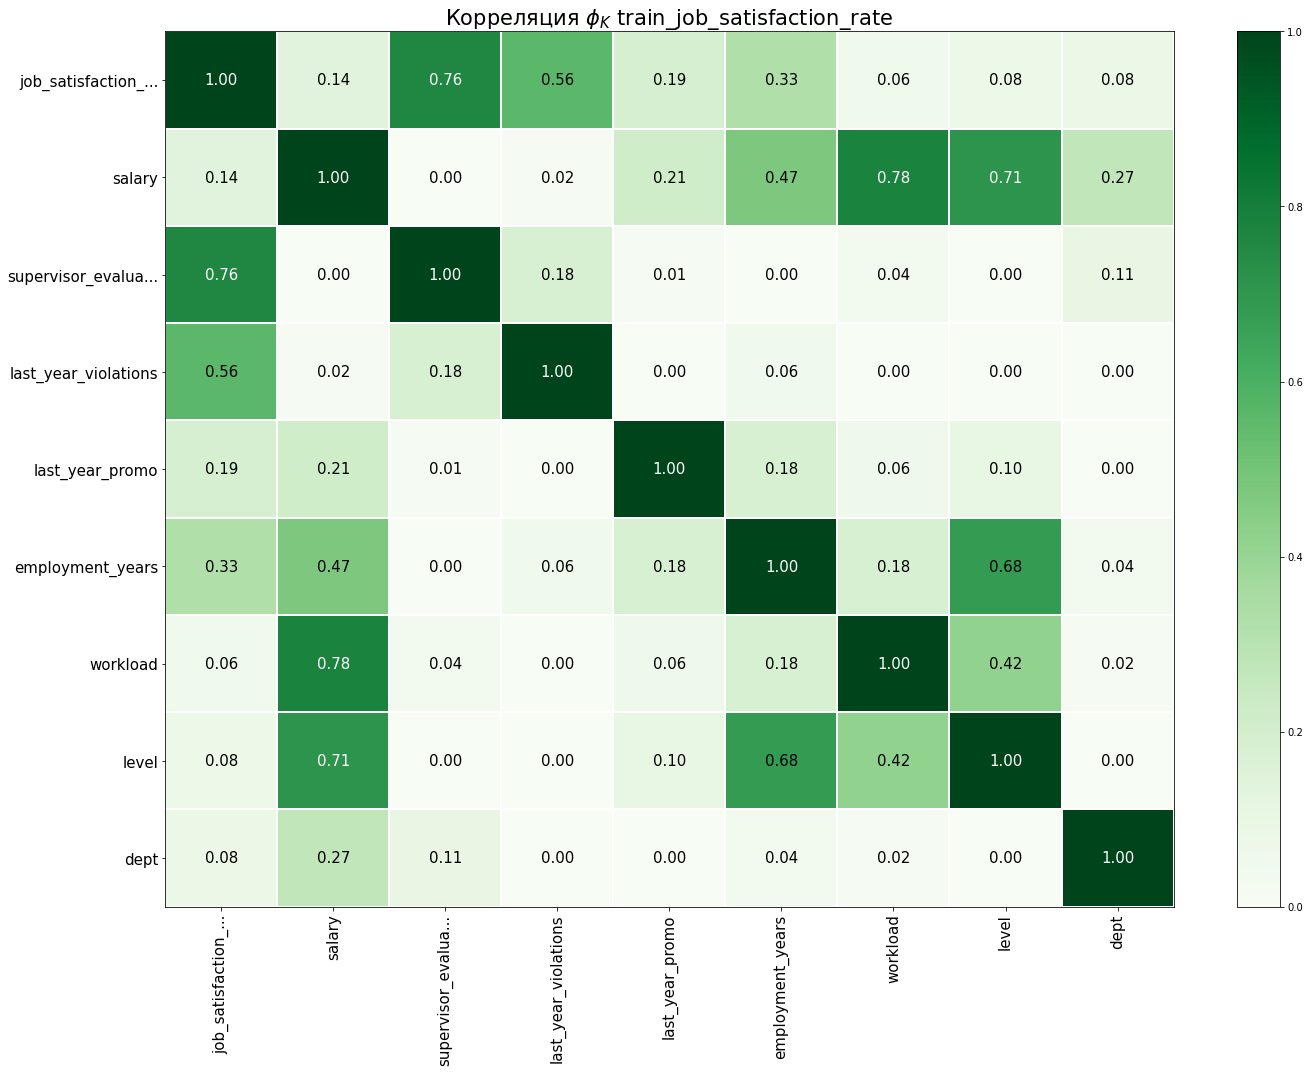

In [59]:
from phik.report import plot_correlation_matrix

plot_correlation_matrix(
    phik_overview_rate.values,
    x_labels=phik_overview_rate.columns,
    y_labels=phik_overview_rate.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$ train_job_satisfaction_rate',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [60]:
interval_cols_quit = ['salary']
phik_overview_quit = train_quit.drop('id', axis= 1).phik_matrix(interval_cols= interval_cols_quit)
phik_overview_quit

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.00,0.00,0.00,0.00,0.00,0.04,0.04,0.27,0.00
level,0.00,1.00,0.48,0.69,0.11,0.00,0.01,0.74,0.31
workload,0.00,0.48,1.00,0.21,0.04,0.01,0.00,0.79,0.13
employment_years,0.00,0.69,0.21,1.00,0.16,0.00,0.00,0.48,0.66
last_year_promo,0.00,0.11,0.04,0.16,1.00,0.00,0.03,0.21,0.16
last_year_violations,0.04,0.00,0.01,0.00,0.00,1.00,0.18,0.07,0.19
supervisor_evaluation,0.04,0.01,0.00,0.00,0.03,0.18,1.00,0.05,0.25
salary,0.27,0.74,0.79,0.48,0.21,0.07,0.05,1.00,0.51
quit,0.00,0.31,0.13,0.66,0.16,0.19,0.25,0.51,1.00


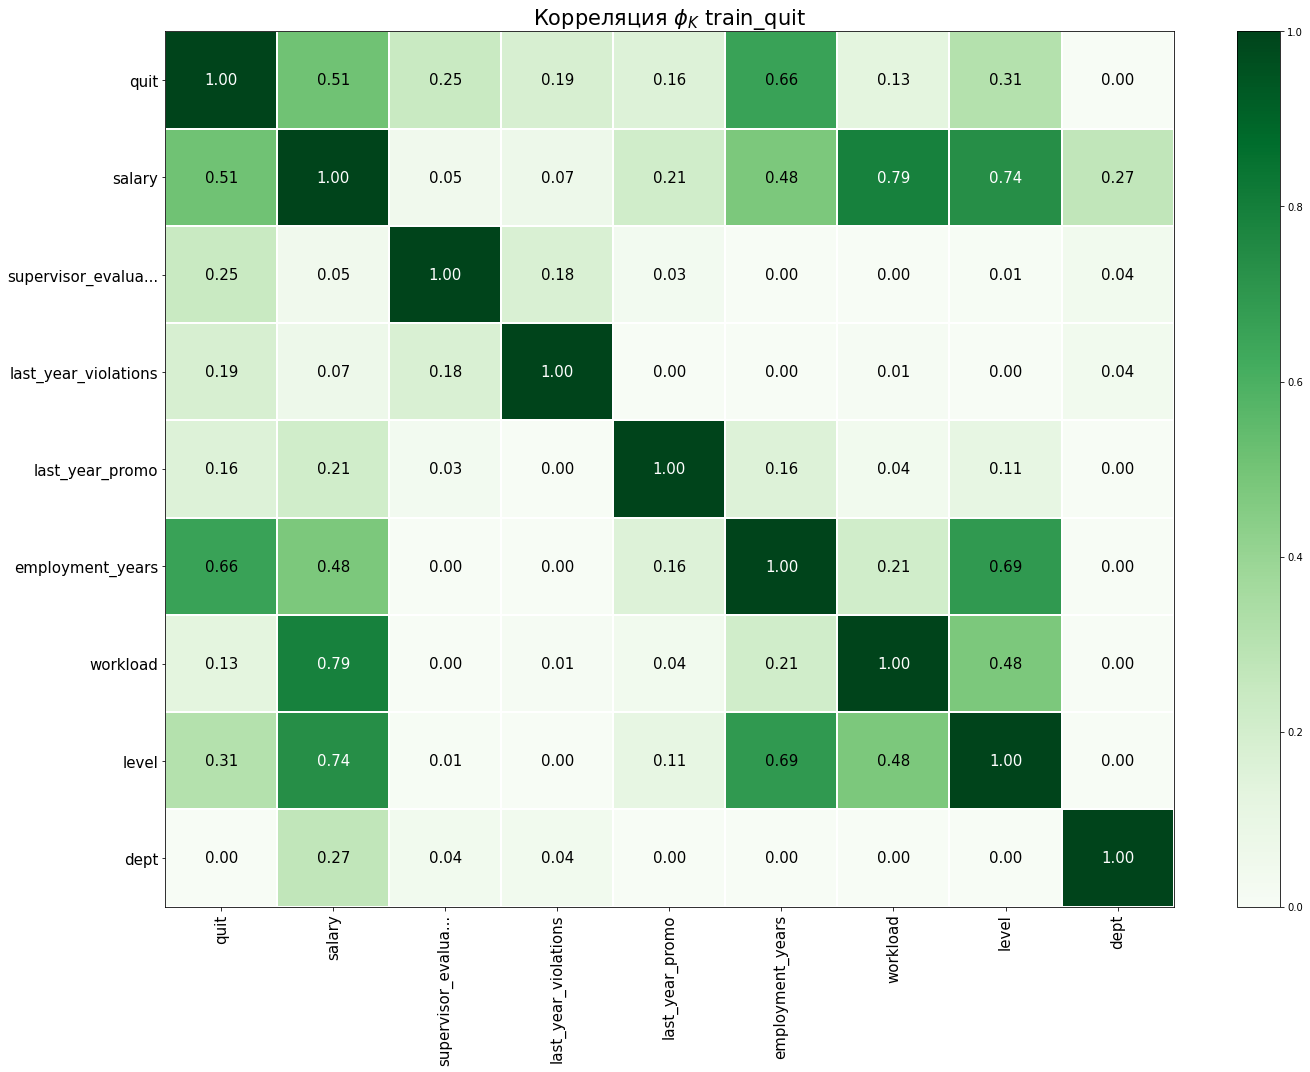

In [61]:
plot_correlation_matrix(
    phik_overview_quit.values,
    x_labels=phik_overview_quit.columns,
    y_labels=phik_overview_quit.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$ train_quit',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Из графиков мы видим, что мультиколлинеарности в данных нет.

Посмотрим на распределение категориальных признаков

In [62]:
dept_train_job_satisfaction_rate = train_job_satisfaction_rate.pivot_table(
    index= 'dept', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

dept_train_quit = train_quit.pivot_table(
    index= 'dept', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

dept_test_features = test_features.pivot_table(
    index= 'dept', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

dept = dept_train_job_satisfaction_rate.merge(dept_train_quit, on='dept', how='right')
dept = dept.merge(dept_test_features, on='dept', how='right')
dept.rename(
    columns = {'id_x':'dept_train_job_satisfaction_rate', 'id_y':'dept_train_quit', 'id': 'test_features'}, inplace=True)

dept

,dept_train_job_satisfaction_rate,dept_train_quit,test_features
dept,,,
hr,456,464,227
purchasing,610,588,273
marketing,550,582,279
technology,866,928,455
sales,1512,1438,764


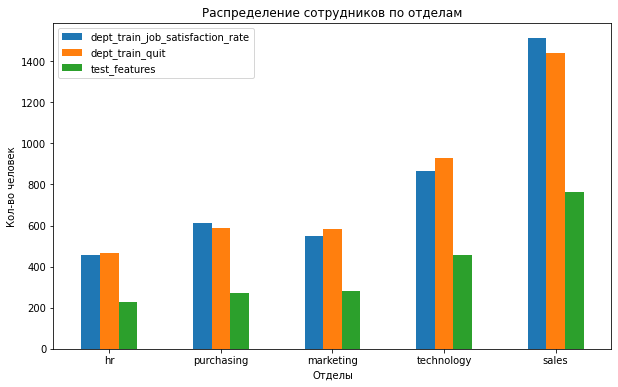

In [63]:
dept.plot(kind='bar', legend= True, rot=0)
plt.title('Распределение сотрудников по отделам')
plt.xlabel('Отделы')
plt.ylabel('Кол-во человек')
plt.show()

Больше всего в данных представлено сотрудников отдела продаж.

In [64]:
level_train_job_satisfaction_rate = train_job_satisfaction_rate.pivot_table(
    index= 'level', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

level_train_quit = train_quit.pivot_table(
    index= 'level', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

level_test_features = test_features.pivot_table(
    index= 'level', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

level = level_train_job_satisfaction_rate.merge(level_train_quit, on='level', how='right')
level = level.merge(level_test_features, on='level', how='right')
level.rename(
    columns = {'id_x':'dept_train_job_satisfaction_rate', 'id_y':'dept_train_quit', 'id': 'test_features'}, inplace=True)

level

,dept_train_job_satisfaction_rate,dept_train_quit,test_features
level,,,
senior,358,357,171
middle,1744,1694,854
junior,1894,1949,974


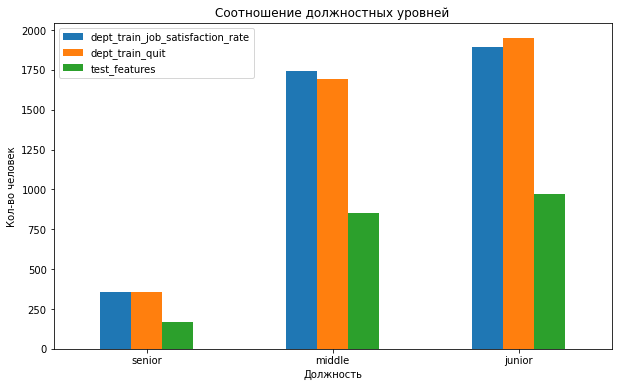

In [65]:
level.plot(kind='bar', legend= True, rot=0)
plt.title('Соотношение должностных уровней')
plt.xlabel('Должность')
plt.ylabel('Кол-во человек')
plt.show()

Меньше всего в компании сотрудников высшей квалификации.

In [66]:
workload_train_job_satisfaction_rate = train_job_satisfaction_rate.pivot_table(
    index= 'workload', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

workload_train_quit = train_quit.pivot_table(
    index= 'workload', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

workload_test_features = test_features.pivot_table(
    index= 'workload', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

workload = workload_train_job_satisfaction_rate.merge(workload_train_quit, on='workload', how='right')
workload = workload.merge(workload_test_features, on='workload', how='right')
workload.rename(
    columns = {'id_x':'dept_train_job_satisfaction_rate', 'id_y':'dept_train_quit', 'id': 'test_features'}, inplace=True)

workload

,dept_train_job_satisfaction_rate,dept_train_quit,test_features
workload,,,
high,734,674,363
low,1200,1208,593
medium,2066,2118,1044


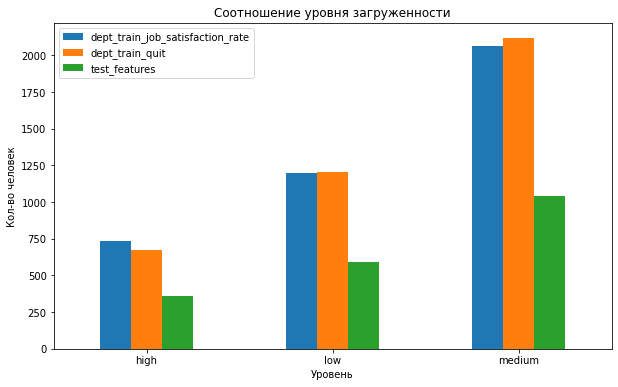

In [67]:
workload.plot(kind='bar', legend= True, rot=0)
plt.title('Соотношение уровня загруженности')
plt.xlabel('Уровень')
plt.ylabel('Кол-во человек')
plt.show()

Высокую нагрузку в компании имеют менее 20% сотрудников.

In [68]:
promo_train_job_satisfaction_rate = train_job_satisfaction_rate.pivot_table(
    index= 'last_year_promo', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

promo_train_quit = train_quit.pivot_table(
    index= 'last_year_promo', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

promo_test_features = test_features.pivot_table(
    index= 'last_year_promo', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

promo = promo_train_job_satisfaction_rate.merge(promo_train_quit, on='last_year_promo', how='right')
promo = promo.merge(promo_test_features, on='last_year_promo', how='right')
promo.rename(
    columns = {'id_x':'dept_train_job_satisfaction_rate', 'id_y':'dept_train_quit', 'id': 'test_features'}, inplace=True)

promo

,dept_train_job_satisfaction_rate,dept_train_quit,test_features
last_year_promo,,,
yes,120,113,63
no,3880,3887,1937


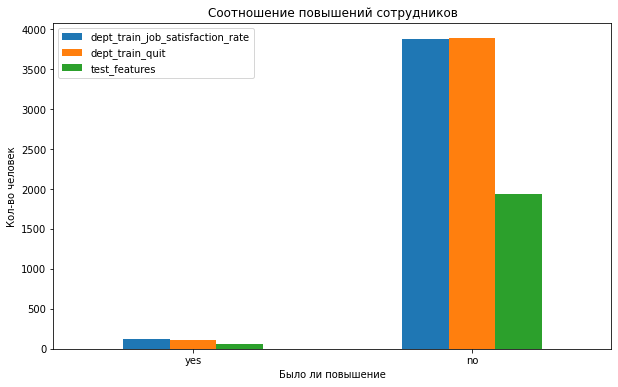

In [69]:
promo.plot(kind='bar', legend= True, rot=0)
plt.title('Соотношение повышений сотрудников')
plt.xlabel('Было ли повышение')
plt.ylabel('Кол-во человек')
plt.show()

Повышение в прошлом году получили лишь 3% сотрудников компании.

In [70]:
violations_train_job_satisfaction_rate = train_job_satisfaction_rate.pivot_table(
    index= 'last_year_violations', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

violations_train_quit = train_quit.pivot_table(
    index= 'last_year_violations', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

violations_test_features = test_features.pivot_table(
    index= 'last_year_violations', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True)

violations = violations_train_job_satisfaction_rate.merge(violations_train_quit, on='last_year_violations', how='right')
violations = violations.merge(violations_test_features, on='last_year_violations', how='right')
violations.rename(
    columns = {'id_x':'dept_train_job_satisfaction_rate', 'id_y':'dept_train_quit', 'id': 'test_features'}, inplace=True)

violations

,dept_train_job_satisfaction_rate,dept_train_quit,test_features
last_year_violations,,,
yes,559,545,262
no,3441,3455,1738


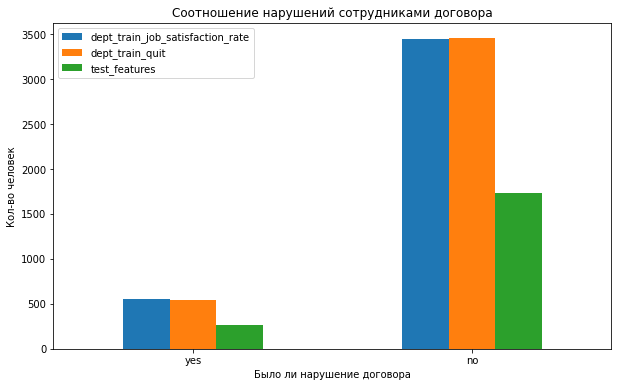

In [71]:
violations.plot(kind='bar', legend= True, rot=0)
plt.title('Соотношение нарушений сотрудниками договора')
plt.xlabel('Было ли нарушение договора')
plt.ylabel('Кол-во человек')
plt.show()

Не все сотрудники работают добросовестно, есть нарушения трудового договора.

### Рассмотрим данные для задачи классификации. Составим портрет "уволившегося сотрудника".

Разделим уволившихся и оставшихся сотрудников и рассмотрим признаки для обеих категорий.

In [72]:
train_quit_yes = train_quit.query('quit == "yes"')
train_quit_yes

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes
...,...,...,...,...,...,...,...,...,...,...
3989,150315,purchasing,junior,low,1,no,no,2,15600,yes
3991,778735,technology,junior,low,2,no,no,4,22800,yes
3994,775320,technology,junior,high,1,no,no,4,42000,yes
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes


In [73]:
train_quit_no = train_quit.query('quit == "no"')
train_quit_no

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
4,910140,marketing,junior,medium,2,no,no,5,25200,no
6,417070,technology,middle,medium,8,no,no,2,44400,no
...,...,...,...,...,...,...,...,...,...,...
3992,106936,marketing,junior,low,1,no,no,5,18000,no
3993,387733,marketing,middle,medium,5,no,no,3,44400,no
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no


Сравним уровень зарплат

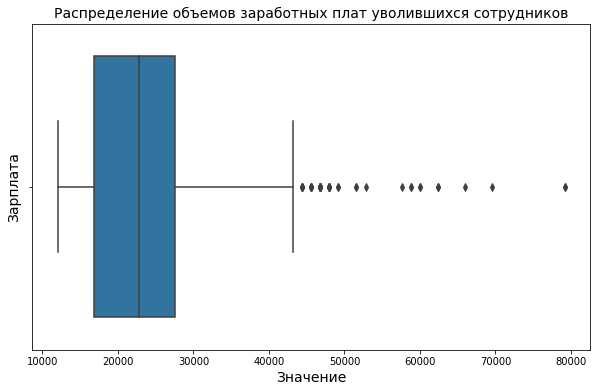

In [74]:
boxplot = sns.boxplot(x= train_quit_yes['salary'])
boxplot.axes.set_title('Распределение объемов заработных плат уволившихся сотрудников', fontsize=14)
boxplot.set_xlabel('Значение', fontsize=14)
boxplot.set_ylabel('Зарплата', fontsize=14);

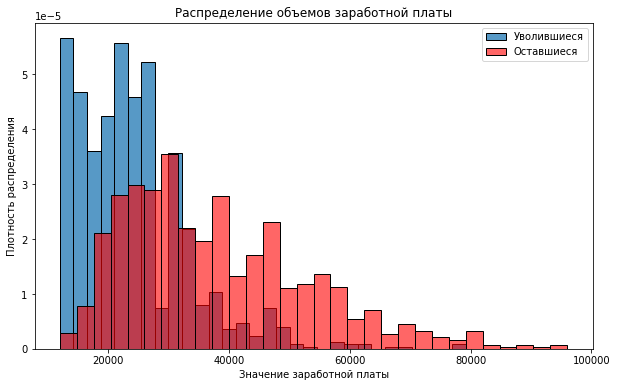

In [75]:
ax= sns.histplot(
    data= train_quit_yes['salary'], 
    stat='density', bins = 30, common_norm=False, label='Уволившиеся'
)

ax= sns.histplot(
    data=  train_quit_no['salary'], 
    stat='density', bins = 30, common_norm=False, label='Оставшиеся', color= 'red', alpha= 0.6
)

plt.title('Распределение объемов заработной платы')
plt.xlabel('Значение заработной платы')
plt.ylabel('Плотность распределения')
plt.legend(loc='upper right')
plt.show()

Сравним нагрузку

In [76]:
workload_train_quit_yes = train_quit_yes.pivot_table(
    index= 'workload', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

workload_train_quit_yes

,workload,id
0,high,121
1,medium,488
2,low,519


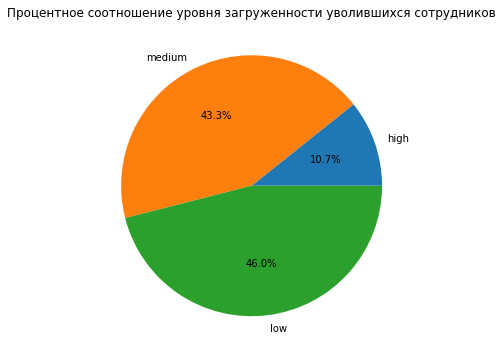

In [77]:
fig, ax = plt.subplots()
ax.pie(workload_train_quit_yes['id'], labels= workload_train_quit_yes['workload'], autopct='%1.1f%%')
plt.title('Процентное соотношение уровня загруженности уволившихся сотрудников')

plt.show()

In [78]:
workload_train_quit_no = train_quit_no.pivot_table(
    index= 'workload', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()
workload_train_quit_no

,workload,id
0,high,553
1,low,689
2,medium,1630


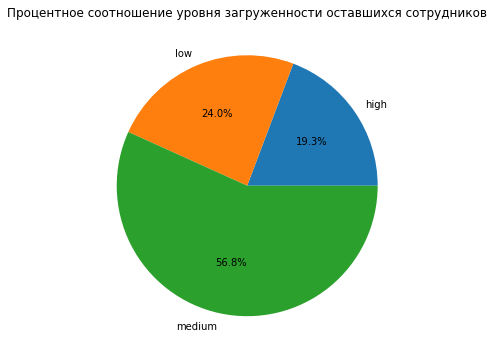

In [79]:
fig, ax = plt.subplots()
ax.pie(workload_train_quit_no['id'], labels= workload_train_quit_no['workload'], autopct='%1.1f%%')
plt.title('Процентное соотношение уровня загруженности оставшихся сотрудников')

plt.show()

Уволившиеся сотрудники имели в основном низкую загруженность на работе.

Посмотрим, из каких отделов больше всего увольнялись сотрудники

In [80]:
dept_train_quit_yes = train_quit_yes.pivot_table(
    index= 'dept', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

dept_train_quit_yes

,dept,id
0,hr,116
1,marketing,163
2,purchasing,166
3,technology,276
4,sales,407


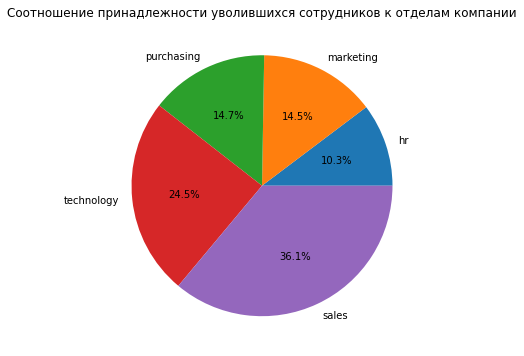

In [81]:
fig, ax = plt.subplots()
ax.pie(dept_train_quit_yes['id'], labels= dept_train_quit_yes['dept'], autopct='%1.1f%%')
plt.title('Соотношение принадлежности уволившихся сотрудников к отделам компании')
plt.show()

In [82]:
dept_train_quit_no = train_quit_no.pivot_table(
    index= 'dept', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

dept_train_quit_no

,dept,id
0,hr,348
1,marketing,419
2,purchasing,422
3,technology,652
4,sales,1031


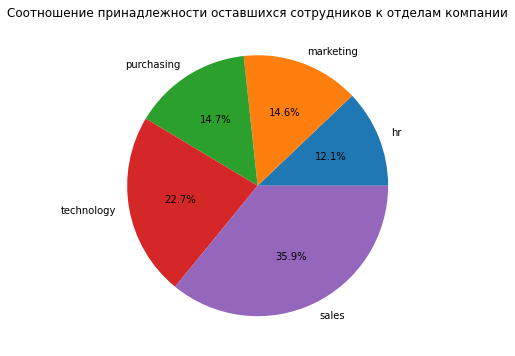

In [83]:
fig, ax = plt.subplots()
ax.pie(dept_train_quit_no['id'], labels= dept_train_quit_no['dept'], autopct='%1.1f%%')
plt.title('Соотношение принадлежности оставшихся сотрудников к отделам компании')
plt.show()

Больше всего уволившихся сотрудников принадлежит к отделу продаж. Но распределение по отделам уволившихся и оставшихся сотрудников примерно одинаковое, так что причину увольнения в конкретном отделе искать не стоит, к тому же отдел продаж - самый многочисленный отдел в компании.

Посмотрим, получали ли повышение уволившиеся сотрудники в прошлом году.

In [84]:
promo_train_quit_yes = train_quit_yes.pivot_table(
    index= 'last_year_promo', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

promo_train_quit_yes

,last_year_promo,id
0,yes,1
1,no,1127


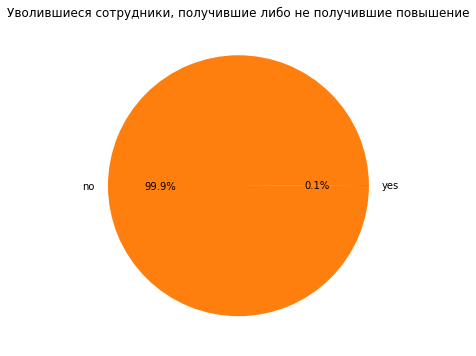

In [85]:
fig, ax = plt.subplots()
ax.pie(promo_train_quit_yes['id'], labels= promo_train_quit_yes['last_year_promo'], autopct='%1.1f%%')
plt.title('Уволившиеся сотрудники, получившие либо не получившие повышение')
plt.show()

Лишь 1 человек из 1128 получил повышение.

Проверим, сотрудники какой квалификации увольнялись из компании.

In [86]:
level_train_quit_yes = train_quit_yes.pivot_table(
    index= 'level', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

level_train_quit_yes

,level,id
0,senior,17
1,middle,108
2,junior,1003


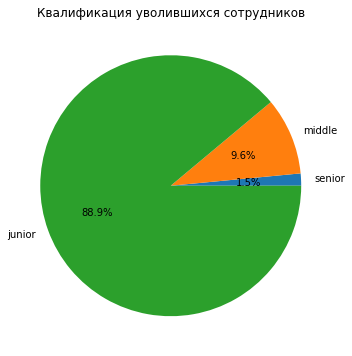

In [87]:
fig, ax = plt.subplots()
ax.pie(level_train_quit_yes['id'], labels= level_train_quit_yes['level'], autopct='%1.1f%%')
plt.title('Квалификация уволившихся сотрудников')
plt.show()

Большинство уволившихся - начинающие специалисты.

Сравним длительность работы в компании

In [88]:
years_train_quit_yes = train_quit_yes.pivot_table(
    index= 'employment_years', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

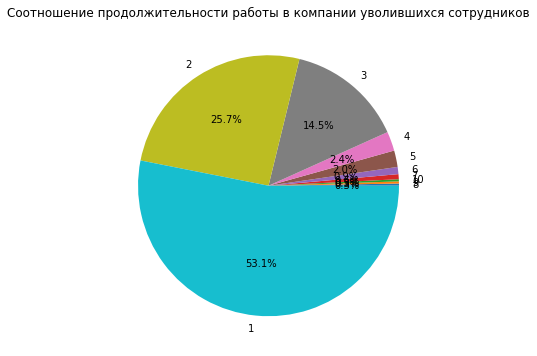

In [89]:
fig, ax = plt.subplots()
ax.pie(years_train_quit_yes['id'], labels= years_train_quit_yes['employment_years'], autopct='%1.1f%%')
plt.title('Соотношение продолжительности работы в компании уволившихся сотрудников')
plt.show()

In [90]:
years_train_quit_no = train_quit_no.pivot_table(
    index= 'employment_years', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

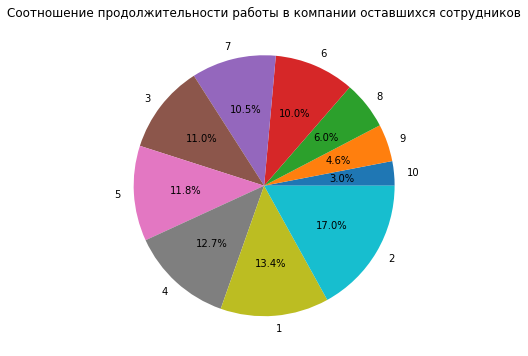

In [91]:
fig, ax = plt.subplots()
ax.pie(years_train_quit_no['id'], labels= years_train_quit_no['employment_years'], autopct='%1.1f%%')
plt.title('Соотношение продолжительности работы в компании оставшихся сотрудников')
plt.show()

Большинство уволившихся сотрудников проработали в компании всего 1 год. 

Проверим, как много сотрудников нарушали трудовой договор за последний год.

In [92]:
violations_train_quit_yes = train_quit_yes.pivot_table(
    index= 'last_year_violations', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()


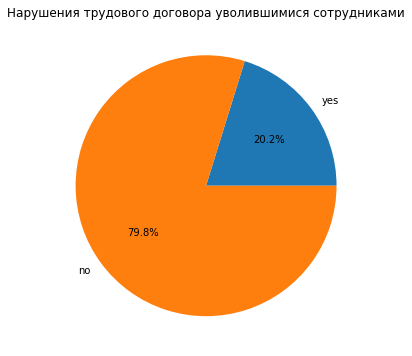

In [93]:
fig, ax = plt.subplots()
ax.pie(violations_train_quit_yes['id'], labels= violations_train_quit_yes['last_year_violations'], autopct='%1.1f%%')
plt.title('Нарушения трудового договора уволившимися сотрудниками')
plt.show()

In [94]:
violations_train_quit_no = train_quit_no.pivot_table(
    index= 'last_year_violations', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

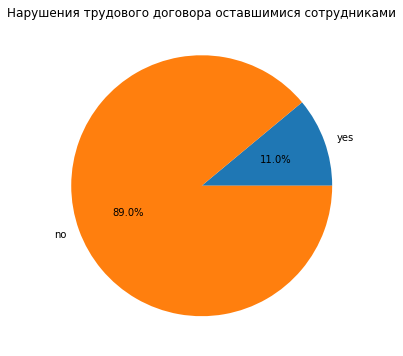

In [95]:
fig, ax = plt.subplots()
ax.pie(violations_train_quit_no['id'], labels= violations_train_quit_no['last_year_violations'], autopct='%1.1f%%')
plt.title('Нарушения трудового договора оставшимися сотрудниками')
plt.show()

Большинство сотрудников (как уволившихся, так и оставшихся) не нарушали трудовой договор. Но среди уволившихся доля нарушавших выше почти в 2 раза.

Посмотрим, какие оценки давали руководители уволившимся и оставшимся сотрудникам.

In [96]:
evaluation_train_quit_yes = train_quit_yes.pivot_table(
    index= 'supervisor_evaluation', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

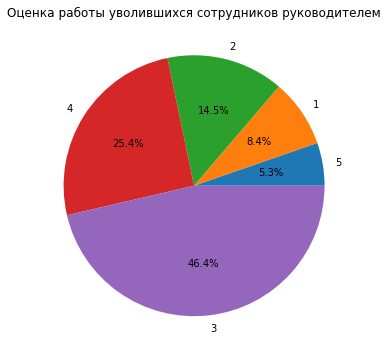

In [97]:
fig, ax = plt.subplots()
ax.pie(evaluation_train_quit_yes['id'], labels= evaluation_train_quit_yes['supervisor_evaluation'], autopct='%1.1f%%')
plt.title('Оценка работы уволившихся сотрудников руководителем')
plt.show()

In [98]:
evaluation_train_quit_no = train_quit_no.pivot_table(
    index= 'supervisor_evaluation', 
    values= 'id', aggfunc= 'count'
).sort_values(by='id', ascending = True).reset_index()

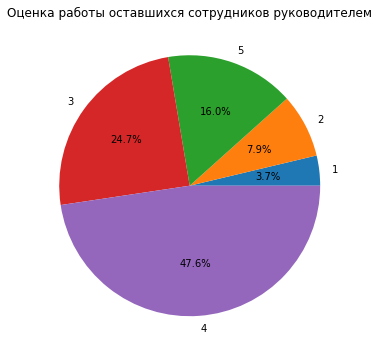

In [99]:
fig, ax = plt.subplots()
ax.pie(evaluation_train_quit_no['id'], labels= evaluation_train_quit_no['supervisor_evaluation'], autopct='%1.1f%%')
plt.title('Оценка работы оставшихся сотрудников руководителем')
plt.show()

Чаще всего руководители оценивали на 3 балла тех, кто в последствии уволился и на 4 балла тех, кто остался в компании.

Итак, можно сказать, что типичный уволившийся сотрудник - это начинающий специалист отдела продаж, имеющий небольшую нагрузку и заработную плату, отработавший в компании не более года, не получивший повышения и оцененный руководителем на 3 балла из 5.

### Сравним признак `job_satisfaction_rate` для уволившихся и оставшихся сотрудников

Объединим данные

In [100]:
test_target = test_target_quit.merge(test_target_job_satisfaction_rate, on= 'id', how= 'left')
test_target.sample(3)

,id,quit,job_satisfaction_rate
1888,746619,yes,0.35
1911,369904,no,0.79
455,250436,no,0.65


In [101]:
test_target_yes = test_target.query('quit == "yes"')
test_target_yes

,id,quit,job_satisfaction_rate
5,429973,yes,0.67
6,850699,yes,0.36
9,937235,yes,0.22
10,354261,yes,0.31
17,780847,yes,0.24
...,...,...,...
1979,649355,yes,0.33
1988,269983,yes,0.46
1995,393147,yes,0.56
1996,109582,yes,0.14


In [102]:
test_target_no = test_target.query('quit == "no"')
test_target_no

,id,quit,job_satisfaction_rate
0,485046,no,0.79
1,686555,no,0.72
2,467458,no,0.64
3,418655,no,0.60
4,789145,no,0.75
...,...,...,...
1992,760964,no,0.70
1993,380255,no,0.81
1994,497976,no,0.70
1998,160233,no,0.43


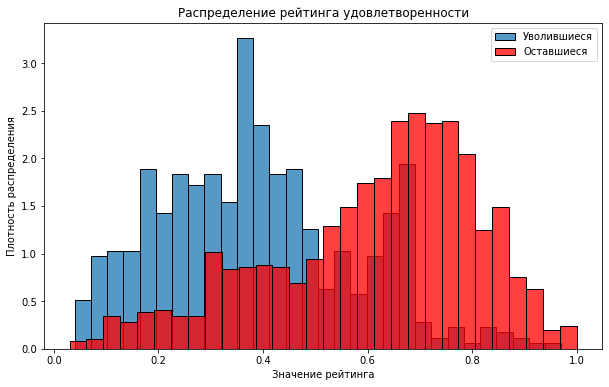

In [103]:
ax= sns.histplot(
    data= test_target_yes['job_satisfaction_rate'], 
    stat='density', bins = 30, common_norm=False, label='Уволившиеся'
)

ax= sns.histplot(
    data= test_target_no['job_satisfaction_rate'], 
    stat='density', bins = 30, common_norm=False, label='Оставшиеся', color= 'red'
)

plt.title('Распределение рейтинга удовлетворенности')
plt.xlabel('Значение рейтинга')
plt.ylabel('Плотность распределения')
plt.legend(loc='upper right')
plt.show()

Из графика видим, что удовлетворенность уволившихся сотрудников действительно ниже, чем у оставшихся.

## Задача регрессии

### Подготовка данных

In [104]:
# сделаем индексами id
test_features.set_index('id', inplace = True)
test_target_job_satisfaction_rate.set_index('id', inplace = True)
train_job_satisfaction_rate.set_index('id', inplace = True)

После этой процедуры проверим данные на дубликаты

In [105]:
get_duplcate()

Дубликатов в датафрейме train_job_satisfaction_rate: 245 - это 0.06 от всех данных
Дубликатов в датафрейме test_features: 558 - это 0.28 от всех данных
Дубликатов в датафрейме test_target_job_satisfaction_rate: 1902 - это 0.95 от всех данных
Дубликатов в датафрейме train_quit: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_target_quit: 0 - это 0.0 от всех данных


Удалим дубликаты на тренировочной выборке

In [106]:
train_job_satisfaction_rate = train_job_satisfaction_rate.drop_duplicates()

In [107]:
# проверим результат

get_duplcate()

Дубликатов в датафрейме train_job_satisfaction_rate: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_features: 558 - это 0.28 от всех данных
Дубликатов в датафрейме test_target_job_satisfaction_rate: 1902 - это 0.95 от всех данных
Дубликатов в датафрейме train_quit: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_target_quit: 0 - это 0.0 от всех данных


In [108]:
# разделим данные на выборки

RANDOM_STATE = 42

X_test = test_features
y_test = test_target_job_satisfaction_rate

X_train = train_job_satisfaction_rate.drop(['job_satisfaction_rate'], axis=1)
y_train = train_job_satisfaction_rate['job_satisfaction_rate']

In [109]:
# введём обозначения для типов исходных данных

ohe_columns = ['dept','last_year_promo', 'last_year_violations']

ord_columns = ['level', 'workload']

num_columns = ['employment_years', 'supervisor_evaluation', 'salary'] 

In [110]:
# переходим к созданию пайплайна

ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False)
        )
    ]
) 

In [111]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        
        (
            'ord', OrdinalEncoder(categories=[
            ['junior', 'middle', 'senior'],
            ['low', 'medium', 'high']

            ],
            handle_unknown='use_encoded_value', unknown_value=np.nan
        )),
        
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
])

In [112]:
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', StandardScaler(), num_columns)
]) 

In [113]:
# создаем итоговый пайплайн

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state= RANDOM_STATE))
]) 

### Обучение моделей

In [114]:
# создаем словарь для перебора гиперпараметров моделей

param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 30),
        #'models__max_features': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


In [115]:
# создадим функцию для вычисления метрики SMAPE

def smape(test, pred):
    return (100/len(test)) * ((abs(test-pred) / ((abs(test) + abs(pred)) / 2)).sum())

In [116]:
# создаём объект пользовательской метрики

scorer = make_scorer(smape, greater_is_better=False) 

In [117]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='infrequent_if_exist',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps...
                   n_jobs=-1,
                   param_distributions=[{'models': [DecisionTreeRegressor(random_state=42)],
                                         'models__max_depth': range(2, 30),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False))

In [118]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', abs(randomized_search.best_score_))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleI

In [119]:
best_model = randomized_search
pred = best_model.best_estimator_.predict(X_test)
preds = pd.DataFrame(pred, columns= ['job_satisfaction_rate']).set_index(X_test.index)
print('Метрика SMAPE на тестовой выборке:', smape(y_test, preds))

Метрика SMAPE на тестовой выборке: job_satisfaction_rate   14.49
dtype: float64


Для поиска лучшей модели мы воспользовались рандомизированным поиском гиперпараметров для трёх моделей, и в итоге лучшей моделью стало дерево решений с параметрами: `DecisionTreeRegressor(max_depth=27, random_state=42)` и метрикой SMAPE на тестовой выборке, равной 14.49.

## Задача классификации

### Добавление нового входного признака

Так как признаки `'job_satisfaction_rate'` и `'quit'` действительно связаны и мы получили необходимое значение метрики в первой задаче, добавим `'job_satisfaction_rate'`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [120]:
test_features_cl = test_features.join(preds)
test_features_cl

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.87
686555,hr,junior,medium,1,no,no,4,30000,0.68
467458,sales,middle,low,5,no,no,4,19200,0.65
418655,sales,middle,low,6,no,no,4,19200,0.66
789145,hr,middle,medium,5,no,no,5,40800,0.76
...,...,...,...,...,...,...,...,...,...
393147,marketing,junior,low,3,no,no,3,20400,0.51
109582,technology,middle,low,3,no,no,2,21600,0.10
305653,technology,junior,low,1,no,no,3,14400,0.24


К тренировочной выборке тоже надо добавить этот признак. Для этого нужно сделать новые предсказания.

In [121]:
# сделаем индексами id

train_quit.set_index('id', inplace = True)
test_target_quit.set_index('id', inplace = True)

In [122]:
get_duplcate()

Дубликатов в датафрейме train_job_satisfaction_rate: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_features: 558 - это 0.28 от всех данных
Дубликатов в датафрейме test_target_job_satisfaction_rate: 1902 - это 0.95 от всех данных
Дубликатов в датафрейме train_quit: 1413 - это 0.35 от всех данных
Дубликатов в датафрейме test_target_quit: 1998 - это 1.0 от всех данных


In [123]:
train_quit = train_quit.drop_duplicates()

In [124]:
get_duplcate()

Дубликатов в датафрейме train_job_satisfaction_rate: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_features: 558 - это 0.28 от всех данных
Дубликатов в датафрейме test_target_job_satisfaction_rate: 1902 - это 0.95 от всех данных
Дубликатов в датафрейме train_quit: 0 - это 0.0 от всех данных
Дубликатов в датафрейме test_target_quit: 1998 - это 1.0 от всех данных


In [125]:
# разделим данные на выборки

RANDOM_STATE = 42

X_test_new = train_quit.drop(['quit'], axis=1)

In [126]:
# сделаем предсказания

pred_cl = best_model.best_estimator_.predict(X_test_new)
preds_cl = pd.DataFrame(pred_cl, columns= ['job_satisfaction_rate']).set_index(X_test_new.index)
preds_cl

,job_satisfaction_rate
id,
723290,0.60
814010,0.85
155091,0.38
257132,0.38
910140,0.69
...,...
778735,0.84
106936,0.86
775320,0.54


Добавим предсказания в таблицу

In [127]:
train_quit_cl = train_quit.join(preds_cl)
train_quit_cl

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.60
814010,sales,junior,medium,2,no,no,4,27600,no,0.85
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.38
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.38
910140,marketing,junior,medium,2,no,no,5,25200,no,0.69
...,...,...,...,...,...,...,...,...,...,...
778735,technology,junior,low,2,no,no,4,22800,yes,0.84
106936,marketing,junior,low,1,no,no,5,18000,no,0.86
775320,technology,junior,high,1,no,no,4,42000,yes,0.54


### Подготовка данных

In [128]:
# разделим данные на выборки

RANDOM_STATE = 42

X_test_cl = test_features_cl.copy()
y_test_cl = test_target_quit['quit'].copy()

In [129]:
X_train_cl = train_quit_cl.drop(['quit'], axis=1).copy()
y_train_cl = train_quit_cl['quit'].copy()

In [130]:
# создаем собственный класс с функциями
class LabelEncoding():

    def transform(self, X, **fit_params):
        '''Трансформация данных с LabelEncoder().'''
        enc = LabelEncoder()
        enc_fitted = enc.fit(X)
        enc_final = enc_fitted.transform(X)

        return pd.Series(enc_final, index = X.index, name = X.name)

    def fit_transform(self, X, y = None, **fit_params):
        '''Обучение и трансформация данных с LabelEncoder().'''
        self.fit(X, **fit_params)
        return self.transform(X)

    def fit(self, X, y = None, **fit_params):
        '''Обучение LabelEncoder().'''
        return self

# создаем пайплайн для кодирования
le = Pipeline([('le', LabelEncoding())])

# кодируем таргет в тренировочной и тестовой выборках
y_train_cl = le.fit_transform(y_train_cl)
y_test_cl = le.transform(y_test_cl)

In [131]:
# введём обозначения для типов исходных данных

ohe_columns_cl = ['dept','last_year_promo', 'last_year_violations']

ord_columns_cl = ['level', 'workload']

num_columns_cl = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate'] 

In [132]:
# переходим к созданию пайплайна

data_preprocessor_cl = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns_cl),
    ('ord', ord_pipe, ord_columns_cl),
    ('num', StandardScaler(), num_columns_cl)
]) 

In [133]:
# создаем итоговый пайплайн

pipe_final_cl = Pipeline([
    ('preprocessor_cl', data_preprocessor_cl),
    ('models_cl', DecisionTreeClassifier(random_state= RANDOM_STATE))
]) 

### Обучение моделей

In [134]:
# создаем словарь для перебора гиперпараметров моделей

param_grid_cl = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models_cl': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models_cl__max_depth': range(2, 5),
        'models_cl__max_features': range(2, 5),
        'preprocessor_cl__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models_cl': [KNeighborsClassifier()],
        'models_cl__n_neighbors': range(2, 5),
        'preprocessor_cl__num': [StandardScaler(), MinMaxScaler()]
    },
    
    # словарь для модели RandomForestClassifier()
    {
        'models_cl': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models_cl__max_depth': range(2, 5),
        'preprocessor_cl__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [135]:
randomize_cl = RandomizedSearchCV(
    pipe_final_cl, 
    param_grid_cl, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomize_cl.fit(X_train_cl, y_train_cl)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor_cl',
                                              ColumnTransformer(transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='infrequent_if_exist',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(st...
                                                                  MinMaxScaler(),
                                                                  'passthrough']},
                                        {'models_cl': [KNeighborsClassifier()],
                                         'models_cl__n_neighbors': range(2, 5),
                                         'preprocessor_cl__num': [StandardScaler(),
                                                                  MinMaxScaler()]},
                                        {'models_cl': [RandomForestClassifier(random_state=42)],
                                         'models_cl__max_depth': range(2, 5),
                                         'preprocessor_cl__num': [StandardScaler(),
                                                                  MinMaxScaler(),
                                                                  'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [136]:
print('Лучшая модель и её параметры:\n\n', randomize_cl.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на кросс-валидации:', randomize_cl.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor_cl',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simp

Тестирование лучшей модели

In [137]:
best_model = randomize_cl
pred_class = best_model.best_estimator_.predict(X_test_cl)

pred_prob_class = pd.DataFrame(best_model.best_estimator_.predict_proba(X_test_cl)[:, 1], columns= ['quit']).set_index(X_test_cl.index)

print('Метрика ROC-AUC на тестовой выборке:', roc_auc_score(y_test_cl, pred_prob_class))

Метрика ROC-AUC на тестовой выборке: 0.9220376736008219


Для поиска лучшей модели мы воспользовались рандомизированным поиском гиперпараметров для трёх моделей, и в итоге лучшей моделью стал случайный лес с параметрами: `RandomForestClassifier(max_depth=4, random_state=42)` и метрикой ROC-AUC на тестовой выборке, равной 0.92.

## Общий вывод

**Целью** данного исследования была оптимизация управления персоналом в компании.

Для достижения цели мы сформудировали **две задачи**:
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

На первом этапе работы мы загрузили и изучили данные. 

Следующим этапом работы стал исследовательский анализ данных, по результатам которого можно сделать следующие выводы:
- В данный момент в компании много "новичков", которые работают менее 3 лет.
- Руководители чаще всего оценивают работу сотрудников на 3 и 4 балла. Максимальный балл получают очень немногие.
- На графиках видим большой разброс значений заработной платы, с очень маленьким количеством высоких зарплат (выше 80 тыс.) руководящего состава. В основном заработная плата колеблется от 20 до 40 тысяч.
- Мультиколлинеарности в данных нет.
- Больше всего в данных представлено сотрудников отдела продаж.
- Меньше всего в компании сотрудников высшей квалификации.
- Высокую нагрузку в компании имеют менее 20% сотрудников.
- Повышение в прошлом году получили лишь 3% сотрудников компании.
- Не все сотрудники работают добросовестно, 14% из них нарушали трудовой договор в прошлом году. Процент не маленький.

Также в рамках исследовательского анализа мы составили наиболее вероятный "портрет уволившегося сотрудника": это начинающий специалист отдела продаж, имеющий небольшую нагрузку и заработную плату, отработавший в компании не более двух лет и не получивший повышения.

Далее мы подошли к задаче регрессии и предсказали 'job_satisfaction_rate', после чего перешли к задаче классификации, чтобы предсказать признак 'quit'.

Таким образом, говоря об оптимизации управления персоналом, можно сделать следующие выводы:
- Сотрудники увольняются после первого года работы. Новичкам что-то не нравится в компании. Варианты решения: 
    - более тщательно отбирать кандидатов, выявлять, соответствуют ли их ценности ценностям компании,
    - организовать работу по адаптации новых сотрудников в компании, систему наставничества.
- Мы видим текучесть кадров в основном за счет начинающих сотрудников уровня junior. Возможно стоит рассмотреть внедрение программы обучения и повышения квалификации после полугода работы сотрудника в компании.
- Сотрудники недовольны объемами заработной платы. В этом случае на этапе подбора персонала нужно предупреждать кандидата обо всех финансовых условиях, о том, в каком случае и с какой периодичностью предусмотрен рост вознаграждения. Также по возможности можно пересмотреть принципы оплаты труда.
- Сотрудники не видят возможностей для карьеры, они не дождались повышения. Следует наладить обратную связь в компании, сделать прозрачными критерии оценки работы и повышения, чтобы у каждого сотрудника была четкая картина того, что он может сделать для своего продвижения и в какие сроки.